In [ ]:
pip install pandas matplotlib seaborn statsmodels scikit-learn

In [ ]:
region_classification = {
    'Albany': 'City',
    'Atlanta': 'City',
    'BaltimoreWashington': 'Region',
    'Boise': 'City',
    'Boston': 'City',
    'BuffaloRochester': 'Region',
    'California': 'GreaterRegion',
    'Charlotte': 'City',
    'Chicago': 'City',
    'CincinnatiDayton': 'Region',
    'Columbus': 'City',
    'DallasFtWorth': 'Region',
    'Denver': 'City',
    'Detroit': 'City',
    'GrandRapids': 'City',
    'GreatLakes': 'GreaterRegion',
    'HarrisburgScranton': 'Region',
    'HartfordSpringfield': 'Region',
    'Houston': 'City',
    'Indianapolis': 'City',
    'Jacksonville': 'City',
    'LasVegas': 'City',
    'LosAngeles': 'City',
    'Louisville': 'City',
    'MiamiFtLauderdale': 'Region',
    'Midsouth': 'GreaterRegion',
    'Nashville': 'City',
    'NewOrleansMobile': 'Region',
    'NewYork': 'City',
    'Northeast': 'GreaterRegion',
    'NorthernNewEngland': 'Region',
    'Orlando': 'City',
    'Philadelphia': 'City',
    'PhoenixTucson': 'Region',
    'Pittsburgh': 'City',
    'Plains': 'GreaterRegion',
    'Portland': 'City',
    'RaleighGreensboro': 'Region',
    'RichmondNorfolk': 'Region',
    'Roanoke': 'City',
    'Sacramento': 'City',
    'SanDiego': 'City',
    'SanFrancisco': 'City',
    'Seattle': 'City',
    'SouthCarolina': 'State',
    'SouthCentral': 'GreaterRegion',
    'Southeast': 'GreaterRegion',
    'Spokane': 'City',
    'StLouis': 'City',
    'Syracuse': 'City',
    'Tampa': 'City',
    'TotalUS': 'TotalUS',
    'West': 'GreaterRegion',
    'WestTexNewMexico': 'Region'
}

def get_region(name):
    cat_region = region_classification.get(name)
    return cat_region

# 4. Análisis de Cohortes


## 1 - Cohortes Basadas en Precios Promedios Trimestrales:

Paso 1: Preparar el conjunto de datos


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Leer el archivo CSV y crear una copia
df_original = pd.read_csv('/content/CSV/avocado.csv')
df = df_original.copy()

# Añade columna con categorización de City/Region/GreaterRegion/TotalUS
df['region_type'] = df['region'].transform(lambda x: get_region(x))

# Formato Date
df['Date'] = pd.to_datetime(df['Date'])

#Crear los DF con los filtros
df_greater_regions = df[df['region_type']=='GreaterRegion']
df_region = df[df['region_type']=='Region']
df_city = df[df['region_type']=='City']
df_state = df[df['region_type']=='State']
df_totalus = df[df['region_type']=='TotalUS']

# Agrupar los datos por trimestre y calcular el promedio de precios y la suma de volúmenes
df_trimestres = df_greater_regions.groupby(pd.Grouper(key='Date', freq='Q')).agg({
    'AveragePrice': 'mean',  # Promedio de precios
    'Total Volume': 'sum'    # Suma del volumen total de ventas
})

# Ver las primeras filas para verificar
df_trimestres.head()

<ipython-input-9-58f59cfffd5e>:23: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_trimestres = df_greater_regions.groupby(pd.Grouper(key='Date', freq='Q')).agg({


,AveragePrice,Total Volume
Date,,
2015-03-31,1.303269,4.167143e+08
2015-06-30,1.344087,4.576087e+08
2015-09-30,1.408798,4.175385e+08
2015-12-31,1.313654,3.653937e+08
2016-03-31,1.200481,4.883719e+08


Paso 2: Visualizar los resultados

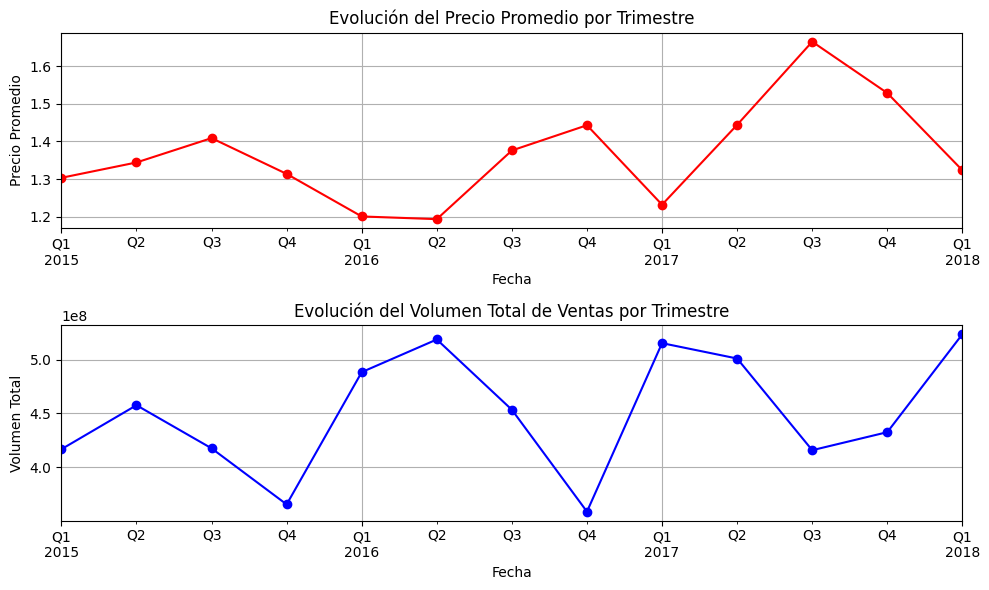

In [ ]:
# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de precios promedio por trimestre
plt.subplot(2, 1, 1)  # Dos filas, una columna, primer gráfico
df_trimestres['AveragePrice'].plot(marker='o', color='red')
plt.title('Evolución del Precio Promedio por Trimestre')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.grid(True)

# Gráfico de volumen total por trimestre
plt.subplot(2, 1, 2)  # Dos filas, una columna, segundo gráfico
df_trimestres['Total Volume'].plot(marker='o', color='blue')
plt.title('Evolución del Volumen Total de Ventas por Trimestre')
plt.xlabel('Fecha')
plt.ylabel('Volumen Total')
plt.grid(True)

# Mostrar gráficos
plt.tight_layout()
plt.show()

## 2 - Cohortes por Región y Fecha



Paso 1: Agrupar por Región y Fecha

In [ ]:
# Preparar filtro para tener en cuenta solo las regiones grandes
greater_regions = df_greater_regions.copy()

# Agrupar por región y fecha, calculando el promedio de precios y la suma del volumen
df_region_fecha = greater_regions.groupby([pd.Grouper(key='Date', freq='Q'), 'region']).agg({
    'AveragePrice': 'mean',
    'Total Volume': 'sum'
}).reset_index()

# Verificar los primeros resultados
df_region_fecha.head()

<ipython-input-11-9326d68ddedb>:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_region_fecha = greater_regions.groupby([pd.Grouper(key='Date', freq='Q'), 'region']).agg({


,Date,region,AveragePrice,Total Volume
0,2015-03-31,California,1.149231,79895346.68
1,2015-03-31,GreatLakes,1.349615,42619772.04
2,2015-03-31,Midsouth,1.349231,34698796.39
3,2015-03-31,Northeast,1.554231,45756467.79
4,2015-03-31,Plains,1.381538,22196876.60


Paso 2: Visualización de los resultados por Región

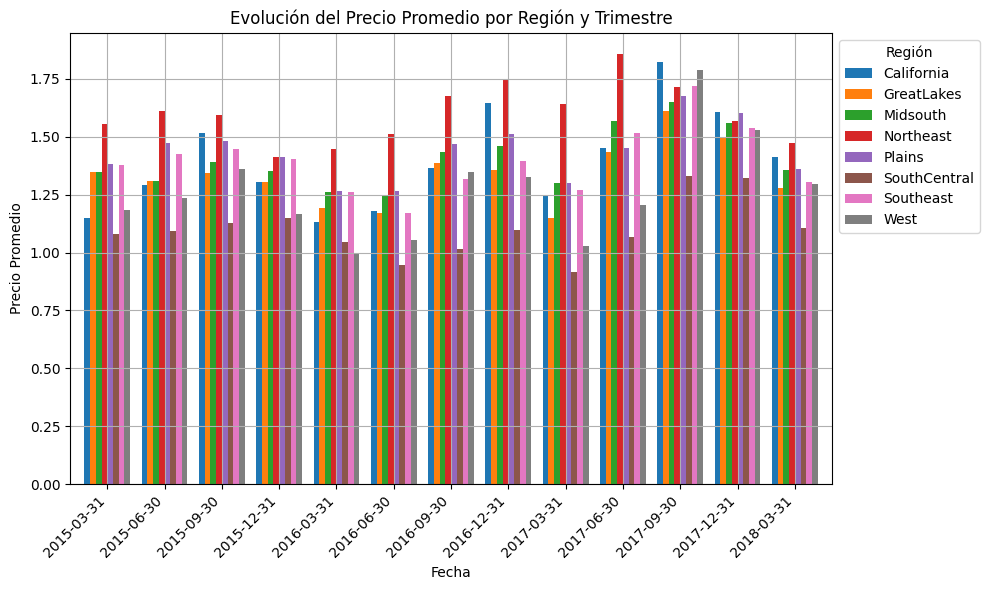

In [ ]:
# Convertir las fechas a cadenas de texto sin la hora
df_region_fecha['Date'] = df_region_fecha['Date'].dt.strftime('%Y-%m-%d')

# Pivotar los datos para tener las regiones como columnas
df_pivot = df_region_fecha.pivot(index='Date', columns='region', values='AveragePrice')

# Graficar los datos
df_pivot.plot(kind='bar', figsize=(10, 6), width=0.8)

plt.title('Evolución del Precio Promedio por Región y Trimestre')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Región', loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

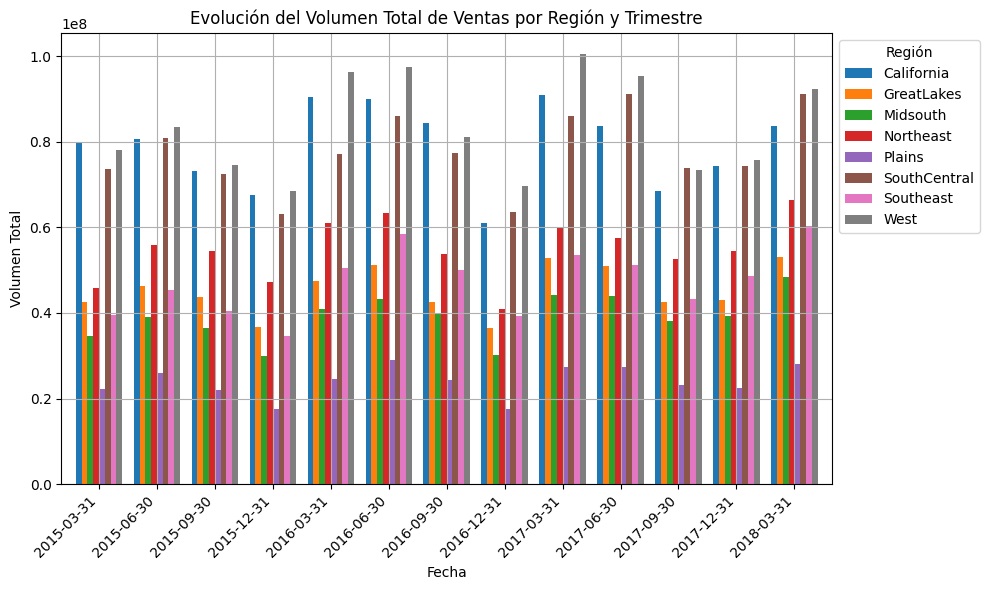

In [ ]:
# Pivotar los datos para tener las regiones como columnas
df_pivot2 = df_region_fecha.pivot(index='Date', columns='region', values='Total Volume')

# Graficar los datos
df_pivot2.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Evolución del Volumen Total de Ventas por Región y Trimestre')
plt.xlabel('Fecha')
plt.ylabel('Volumen Total')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Región', loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


## 3 - Análisis de Cohortes en Función del Tipo de Bolsa

Paso 1: Agrupar por tipo de bolsa y fecha

In [ ]:
df_greater_regions_bags = df_greater_regions.copy()
#Cogemos las columnas que necesitaremos
cohorte_bolsas = df_greater_regions_bags[['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags','Date']]

# Agrupamos por 'Date' y calculamos la suma de cada tipo de bolsa
grupo_bolsas = cohorte_bolsas.groupby('Date').sum()

#Vamos a calcular la suma de los tres tipos de bolsa a ver si coinciden con el total bags
grupo_bolsas['Suma Bolsas'] = grupo_bolsas['Small Bags'] + grupo_bolsas['Large Bags'] + grupo_bolsas['XLarge Bags']

# Verificamos si la suma coincide con 'Total Bags' redondeando a 2 decimales que es la info q tenemos

grupo_bolsas['Bolsas coinciden'] = round(grupo_bolsas['Suma Bolsas'], 2) == round(grupo_bolsas['Total Bags'], 2)

grupo_bolsas['Diferencia bolsas'] = round(grupo_bolsas['Total Bags'] - grupo_bolsas['Suma Bolsas'], 2)

grupo_bolsas[grupo_bolsas['Bolsas coinciden']==False]

,Total Bags,Small Bags,Large Bags,XLarge Bags,Suma Bolsas,Bolsas coinciden,Diferencia bolsas
Date,,,,,,,
2017-11-12,11144377.00,7920410.55,3134027.06,89940.39,11144378.00,False,-1.0
2017-11-19,10482337.98,7249400.22,3137591.18,95348.58,10482339.98,False,-2.0
2017-11-26,8493371.34,6146346.16,2255960.39,91061.79,8493368.34,False,3.0


Paso 2: Visualización de los resultados por tipo de bolsa

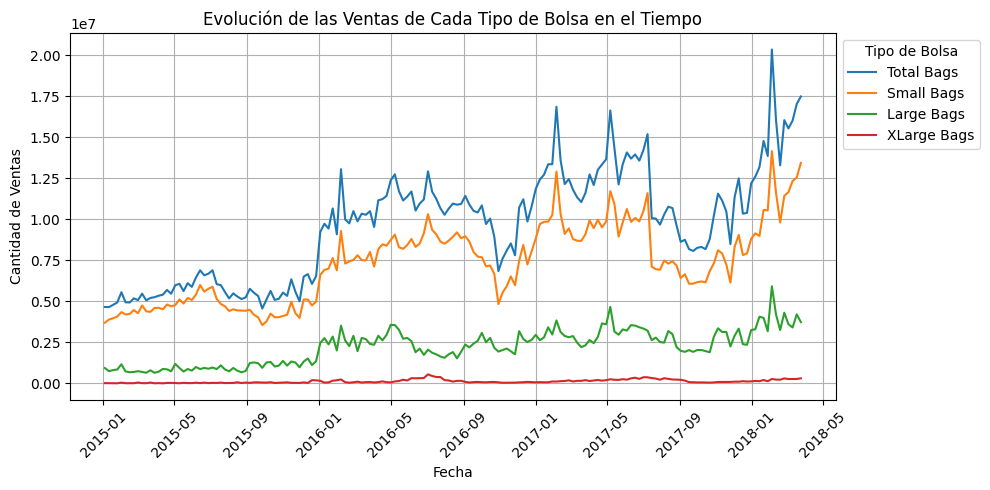

In [ ]:
#Vamos a graficar la evolución de la venta por tipo de bolsa a lo largo del tiempo (el enunciado no sé a qué se refiere con total de ventas...)
# Suponiendo que 'agrup_bags' ya contiene los datos agrupados y sumados por 'Date'
plt.figure(figsize=(10, 5))

# Graficar cada tipo de bolsa
plt.plot(grupo_bolsas.index, grupo_bolsas['Total Bags'], label='Total Bags')
plt.plot(grupo_bolsas.index, grupo_bolsas['Small Bags'], label='Small Bags')
plt.plot(grupo_bolsas.index, grupo_bolsas['Large Bags'], label='Large Bags')
plt.plot(grupo_bolsas.index, grupo_bolsas['XLarge Bags'], label='XLarge Bags')

# Configuración de la gráfica
#plt.yscale('log')
plt.title('Evolución de las Ventas de Cada Tipo de Bolsa en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X
plt.legend(title='Tipo de Bolsa', loc="upper left", bbox_to_anchor=(1, 1))
plt.grid()

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Paso 3: Agrupar por tipo orgánico y convencional

In [ ]:
#Grafiquemos esto mismo pero diferenciando el tipo de aguacate, convencional y orgánico para ver como contribuyen cada uno.
#Cogemos las columnas que necesitaremos
grupo_bolsas_2 = greater_regions[['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags','Date', 'type']]
grupo_bolsas_2_org=grupo_bolsas_2[grupo_bolsas_2['type']=='organic']
grupo_bolsas_2_conv=grupo_bolsas_2[grupo_bolsas_2['type']=='conventional']

# Agrupamos por 'Date' y calculamos la suma de cada tipo de bolsa
grupo_bolsas_2_conv = grupo_bolsas_2_conv.groupby('Date').sum()
grupo_bolsas_2_org = grupo_bolsas_2_org.groupby('Date').sum()

Paso 4: Mostramos resultados

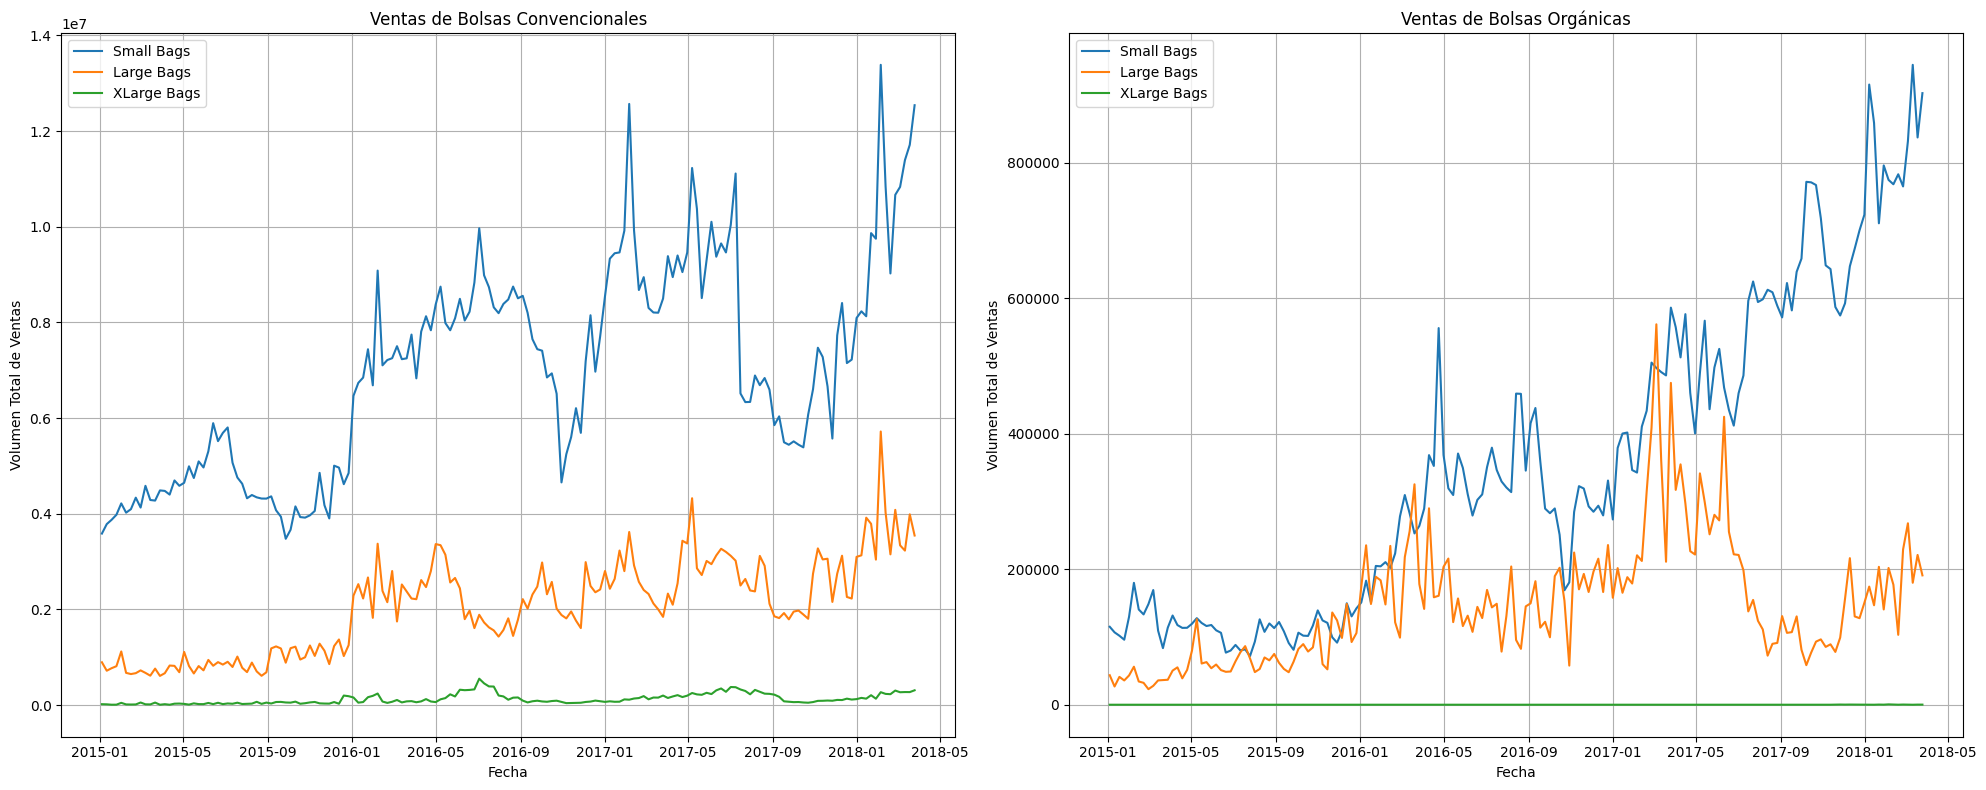

In [ ]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(20, 8))

# Gráfico para las ventas convencionales
plt.subplot(1, 2, 1)  # Primer gráfico en una fila de 1x2
plt.plot(grupo_bolsas_2_conv.index, grupo_bolsas_2_conv['Small Bags'], label='Small Bags')
plt.plot(grupo_bolsas_2_conv.index, grupo_bolsas_2_conv['Large Bags'], label='Large Bags')
plt.plot(grupo_bolsas_2_conv.index, grupo_bolsas_2_conv['XLarge Bags'], label='XLarge Bags')
plt.title('Ventas de Bolsas Convencionales')
plt.xlabel('Fecha')
plt.ylabel('Volumen Total de Ventas')
plt.legend()
plt.grid(True)

# Gráfico para las ventas orgánicas
plt.subplot(1, 2, 2)  # Segundo gráfico en una fila de 1x2
plt.plot(grupo_bolsas_2_org.index, grupo_bolsas_2_org['Small Bags'], label='Small Bags')
plt.plot(grupo_bolsas_2_org.index, grupo_bolsas_2_org['Large Bags'], label='Large Bags')
plt.plot(grupo_bolsas_2_org.index, grupo_bolsas_2_org['XLarge Bags'], label='XLarge Bags')
plt.title('Ventas de Bolsas Orgánicas')
plt.xlabel('Fecha')
plt.ylabel('Volumen Total de Ventas')
plt.legend()
plt.grid(True)

# Mostrar los gráficos
plt.tight_layout()
plt.show()

## 4 - Cohortes de Clientes Basadas en Ventas

Paso 1: Agrupar por región y fecha

In [32]:
#Vamos a definir cohortes segun el volumen total de ventas.
# Agrupamos por período de tiempo AÑO, también por región y sumamos el volumen de ventas de esa agrupación
df_greater_regions_sales = df_greater_regions.copy()

df_greater_regions_sales = df_greater_regions_sales[['Total Volume', 'region', 'Date']].copy()
cohorte_volume_sales = df_greater_regions_sales.groupby([pd.Grouper(key='Date', freq='Y'), 'region'])['Total Volume'].sum().reset_index()

#Clasificamos en categorías de volumen ( bajo, medio, alto, usando q=3) q divide en 3 partes iguales y a cada grupo le pone estas etiquetas
cohorte_volume_sales['Tipo_Volumen'] = pd.qcut(cohorte_volume_sales['Total Volume'], q=3, labels=['Bajo', 'Medio', 'Alto'])


# Pivot para tener cada combinación de región con volume_category en una columna con el valor de la total volume
cohorte_pivot = cohorte_volume_sales.pivot(index='Date', columns=['region', 'Tipo_Volumen'], values='Total Volume')

<ipython-input-32-e201ae086c07>:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  cohorte_volume_sales = df_greater_regions_sales.groupby([pd.Grouper(key='Date', freq='Y'), 'region'])['Total Volume'].sum().reset_index()


Paso 2: Visualización de las cohortes de clientes

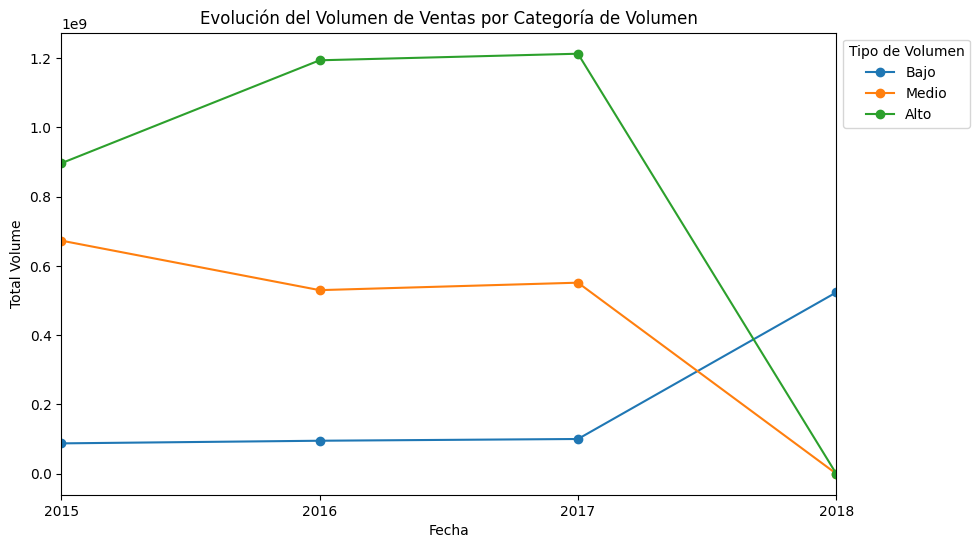

In [30]:
# Gráfica de cada categoría de volumen
cohorte_volume_sales.groupby(['Date', 'Tipo_Volumen'], observed=False)['Total Volume'].sum().unstack().plot(marker='o', figsize=(10, 6))
plt.title('Evolución del Volumen de Ventas por Categoría de Volumen')
plt.xlabel('Fecha')
plt.ylabel('Total Volume')
plt.legend(title='Tipo de Volumen', loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

Paso 3: Agrupar por meses

In [44]:
# Agrupar por período de tiempo MES, región y sumar el volumen de ventas

df_greater_regions_sales_2=greater_regions[['Total Volume', 'region', 'Date']].copy()
cohorte_volume_sales_2 = df_greater_regions_sales_2.groupby([pd.Grouper(key='Date', freq='M'), 'region'])['Total Volume'].sum().reset_index()

#Clasificar en categorías de volumen ( bajo, medio, alto usando q=3)
cohorte_volume_sales_2['Tipo_Volumen'] = pd.qcut(cohorte_volume_sales_2['Total Volume'], q=3, labels=['Bajo', 'Medio', 'Alto'])


# Pivot para tener cada combinación de región con volume_category en una columna con el valor de la total volume
cohorte_pivot_2 = cohorte_volume_sales_2.pivot(index='Date', columns=['region', 'Tipo_Volumen'], values='Total Volume')

<ipython-input-44-63280c7b7060>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cohorte_volume_sales_2 = df_greater_regions_sales_2.groupby([pd.Grouper(key='Date', freq='M'), 'region'])['Total Volume'].sum().reset_index()


Paso 4: Mostrar resultados

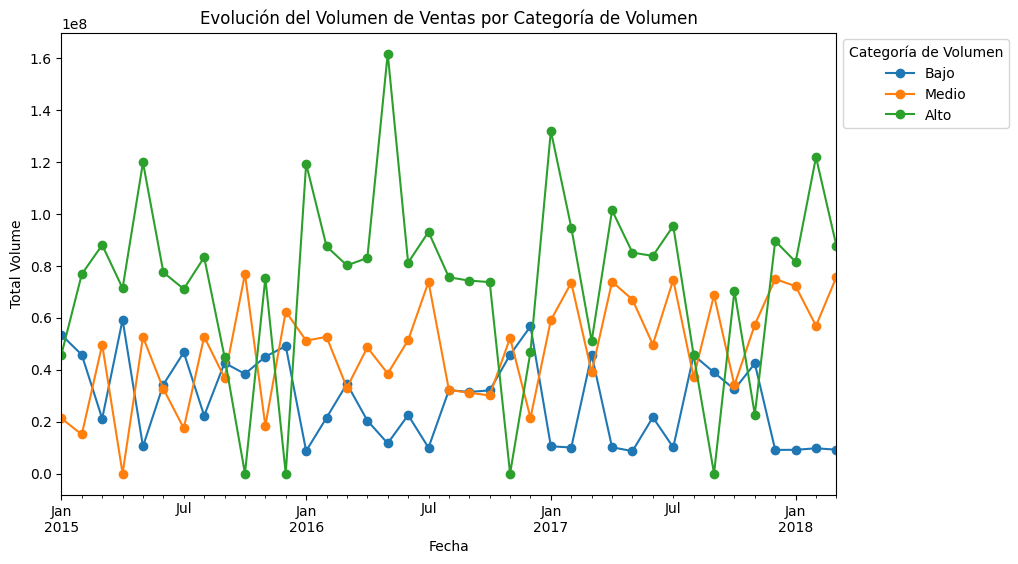

In [40]:
# Gráfica de cada categoría de volumen
cohorte_volume_sales_2.groupby(['Date', 'Tipo_Volumen'], observed=False)['Total Volume'].sum().unstack().plot(marker='o', figsize=(10, 6))
plt.title('Evolución del Volumen de Ventas por Categoría de Volumen')
plt.xlabel('Fecha')
plt.ylabel('Total Volume')
plt.legend(title='Categoría de Volumen', loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

Paso 5: Agrupar por región

In [47]:
# Haremos lo mismo pero ahora consideraremos dividir esas categorias según la region
# Agrupamos los datos por 'Date', 'region' y 'Volume_Category'
cohorte_junto = cohorte_volume_sales.groupby(['Date', 'region', 'Tipo_Volumen'],observed=False)['Total Volume'].sum().reset_index()

Paso 6: Mostrar resultados

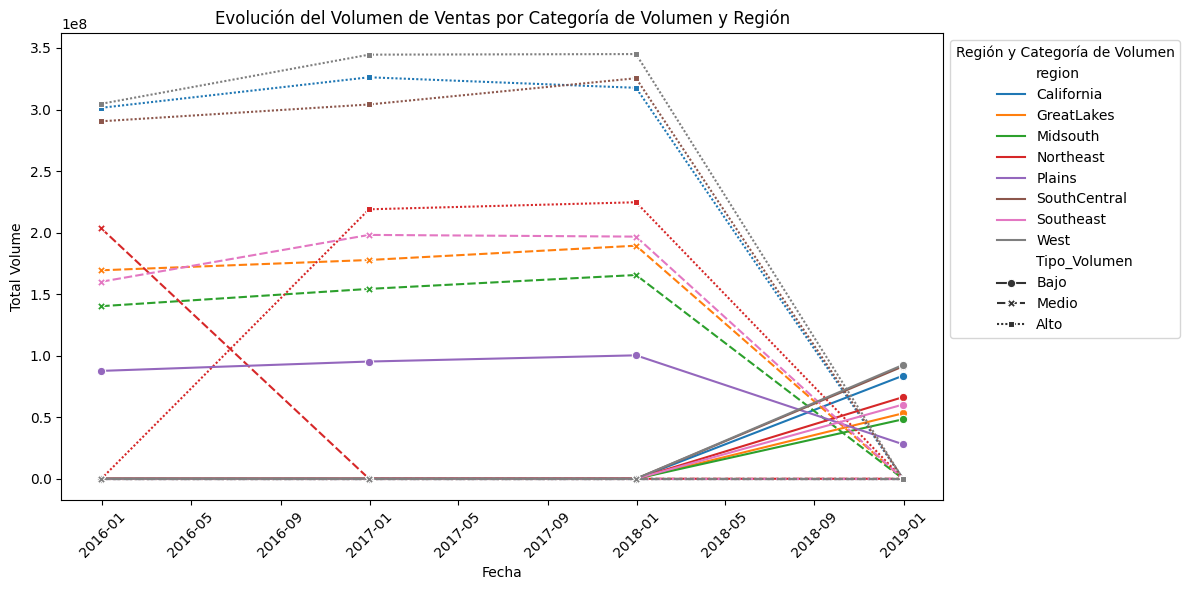

In [51]:
import seaborn as sns
# Gráfico de línea que muestra el Total Volume por Volume_Category y región
plt.figure(figsize=(12, 6))
sns.lineplot(data=cohorte_junto,
             x='Date',
             y='Total Volume',
             hue='region',
             style='Tipo_Volumen',
             markers=True)

plt.title('Evolución del Volumen de Ventas por Categoría de Volumen y Región')
plt.xlabel('Fecha')
plt.ylabel('Total Volume')
plt.legend(title='Región y Categoría de Volumen', loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Paso 7: Refinar analisis

In [58]:
#Vamos a definir cohortes segun el volumen total de ventas.
# Agrupamos por período de tiempo AÑO, también por región y sumamos el volumen de ventas de esa agrupación
# Puesto que 2018 sólo contiene datos hasta marzo, filtraremos hasta finales de 2017 para que no nos desvirtúe la gráfica
df_refinar = df[(df['region']!='TotalUS') & (df['Date'].dt.year<=2017)].copy()
df_refinar= df_refinar[['Total Volume', 'region', 'Date']].copy()
Cohorte_4_refinar = df_refinar.groupby([pd.Grouper(key='Date', freq='Y'), 'region'])['Total Volume'].sum().reset_index()



<ipython-input-58-5f15bfcef1dc>:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  Cohorte_4_refinar = df_refinar.groupby([pd.Grouper(key='Date', freq='Y'), 'region'])['Total Volume'].sum().reset_index()


Paso 8: Mostrar resultados

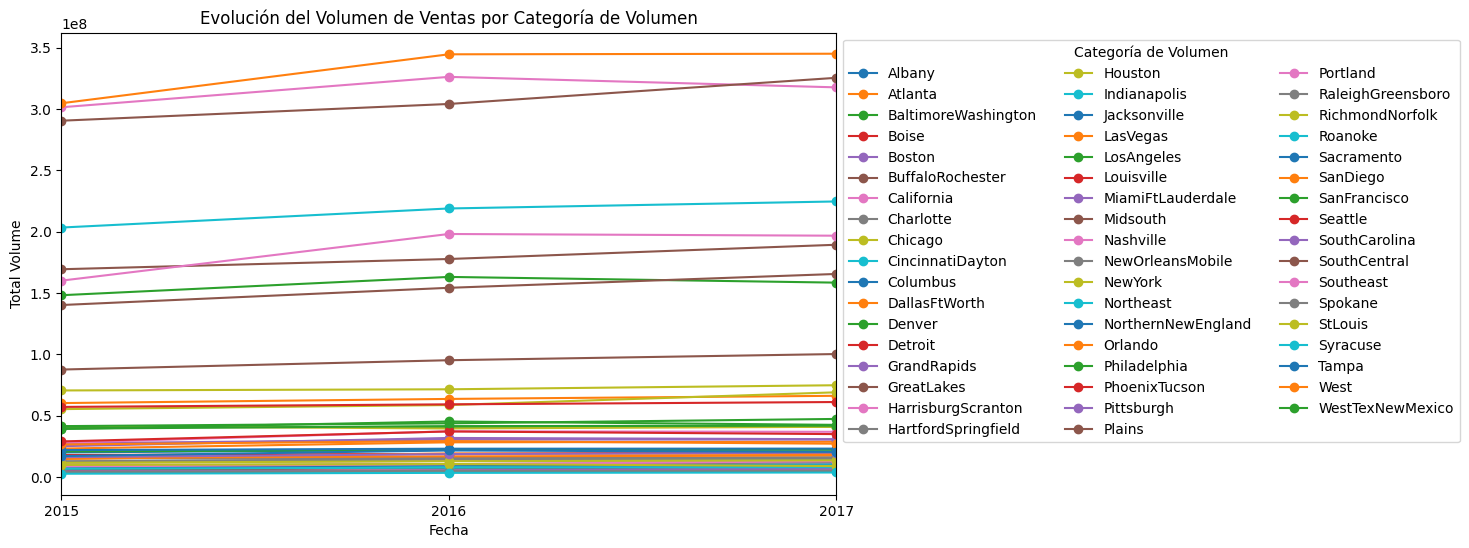

In [57]:
# Gráfica de cada categoría de volumen
Cohorte_4_refinar.groupby(['Date', 'region'], observed=False)['Total Volume'].sum().unstack().plot(marker='o', figsize=(10, 6))
plt.title('Evolución del Volumen de Ventas por Categoría de Volumen')
plt.xlabel('Fecha')
plt.ylabel('Total Volume')
plt.legend(title='Categoría de Volumen', loc="upper left", bbox_to_anchor=(1, 1), ncol=3)
plt.show()

In [60]:
vol_top = Cohorte_4_refinar[Cohorte_4_refinar['Total Volume']>2.5e8]
print('Cohorte Top-Volume: ', vol_top['region'].unique(), '\n')

vol_med = Cohorte_4_refinar[(Cohorte_4_refinar['Total Volume']>1e8) & (Cohorte_4_refinar['Total Volume']<2.5e8)]
print('Cohorte Medium-Volume: ', vol_med['region'].unique(), '\n')

vol_low = Cohorte_4_refinar[Cohorte_4_refinar['Total Volume']<1e8]
print('Cohorte Low-Volume: ', vol_low['region'].unique())

Cohorte Top-Volume:  ['California' 'SouthCentral' 'West'] 

Cohorte Medium-Volume:  ['GreatLakes' 'LosAngeles' 'Midsouth' 'Northeast' 'Southeast' 'Plains'] 

Cohorte Low-Volume:  ['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'Charlotte' 'Chicago' 'CincinnatiDayton' 'Columbus'
 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'HarrisburgScranton'
 'HartfordSpringfield' 'Houston' 'Indianapolis' 'Jacksonville' 'LasVegas'
 'Louisville' 'MiamiFtLauderdale' 'Nashville' 'NewOrleansMobile' 'NewYork'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'Spokane' 'StLouis' 'Syracuse' 'Tampa' 'WestTexNewMexico']


## 5 - Evaluación de Retención de Ventas por Cohorte

Paso 1: Agrupar por mes y cohorte

In [ ]:
# Agrupar los datos por mes
df_retencion = df.groupby([pd.Grouper(key='Date', freq='M')]).agg({
    'Total Volume': 'sum'
}).reset_index()

# Verificar los primeros resultados
print(df_retencion.head())

Paso 2: Visualización de la retención de ventas

In [ ]:
# Crear gráfico de retención de ventas a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(df_retencion['Date'], df_retencion['Total Volume'], marker='o', color='purple')
plt.title('Retención de Ventas por Cohorte')
plt.xlabel('Fecha')
plt.ylabel('Volumen de Ventas')
plt.grid(True)
plt.show()